# Covid-19 and Pneumonia Classification with Deep Learning

You are a researcher in a hospital lab and are given the task to develop a learning model that supports doctors with diagnosing illnesses that affect patients’ lungs. At your disposal, you have a set X-ray lung scans with examples of patients who had either pneumonia, Covid-19, or no illness. Using the Keras module, you will create a classification model that outputs a diagnosis based on a patient’s X-ray scan. You hope this model can help doctors with the challenge of deciphering X-ray scans and open a dialogue between your research team and the medical staff to create learning models that are as effective and interpretable as possible.


Load in your image data and get it ready for the journey through a neural network. One possible way to do this is to use an ImageGenerator object; however, feel free to try other methods you may have experienced before this project.
When creating the object, remember that neural networks struggle with large integer values. Think about how you might want to get your image data ready for your neural network and get the best results.


You will want to create two different iterable objects from this ImageDataGenerator: a train set and a test/validation set.
When you are creating these sets of images consider the following:
The directory the images come from
The types of images you are working with
The target size of the images
Click the hint below if you need any other guidance.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [4]:
data_generator = ImageDataGenerator(rescale=1.0/255, zoom_range=0.1, rotation_range=25, width_shift_range=0.05, height_shift_range=0.05)
batch = 4
training_iterator = data_generator.flow_from_directory('augmented-data/train',batch_size = batch,color_mode='grayscale', class_mode='sparse')

validation_iterator = data_generator.flow_from_directory('augmented-data/test',batch_size = batch,color_mode='grayscale', class_mode='sparse')
model = Sequential()

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


Now that your image data is loaded and ready for analysis, create a classification neural network model to perform on the medical data.
With image data, there are a ton of directions to go in. To get you grounded, we recommend you start by creating your input layer and output layer and compile it before diving into creating a more complex model.
When starting your neural network, consider the following:

The shape of your input
The shape of your output
Using any activation functions for your output
Your gradient descent optimizer
Your learning rate
Your loss functions and metrics
Flattening the image data before the output layer

In [9]:
model = Sequential()
model.add(layers.Input(shape=training_iterator.image_shape))
model.add(layers.Conv2D(4, 3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=3))
model.add(layers.Conv2D(4, 3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=3))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
print(model.summary())
es = EarlyStopping(monitor='accuracy', patience=3)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 4)       40        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 82, 82, 4)         148       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 27, 4)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2916)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                46672     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

It’s time to test out the model you created!

Fit your model with your training set and test it out with your validation/test set.

Since you have not added many layers yet or played around with hyperparameters, it may not be very accurate yet. Do not fret! Your next adventure will be to play with your model and mold it until you see more ideal results.

In [10]:
model.fit(training_iterator, steps_per_epoch=16, epochs=64, validation_data=validation_iterator, validation_steps=16, callbacks=[es])

Epoch 1/64
16/16 [==============================] - 6s 217ms/step - loss: 1.1159 - accuracy: 0.4688 - val_loss: 1.0710 - val_accuracy: 0.2969
Epoch 2/64
16/16 [==============================] - 2s 152ms/step - loss: 1.0431 - accuracy: 0.4531 - val_loss: 0.9726 - val_accuracy: 0.4531
Epoch 3/64
16/16 [==============================] - 2s 143ms/step - loss: 0.7922 - accuracy: 0.6875 - val_loss: 1.2198 - val_accuracy: 0.5938
Epoch 4/64
16/16 [==============================] - 2s 146ms/step - loss: 0.9033 - accuracy: 0.6562 - val_loss: 0.7725 - val_accuracy: 0.6562
Epoch 5/64
16/16 [==============================] - 2s 134ms/step - loss: 0.6635 - accuracy: 0.7812 - val_loss: 0.7341 - val_accuracy: 0.7344
Epoch 6/64
16/16 [==============================] - 2s 135ms/step - loss: 0.8717 - accuracy: 0.6406 - val_loss: 0.5431 - val_accuracy: 0.8281
Epoch 7/64
16/16 [==============================] - 2s 137ms/step - loss: 0.7039 - accuracy: 0.7344 - val_loss: 0.6363 - val_accuracy: 0.7188
Epoch 

Plot the cross-entropy loss for both the train and validation data over each epoch using the Matplotlib Library. You can also plot the AUC metric for both your train and validation data as well. This will give you an insight into how the model performs better over time and can also help you figure out better ways to tune your hyperparameters.

Because of the way Matplotlib plots are displayed in the learning environment, please use fig.savefig('static/images/my_plots.png') at the end of your graphing code to render the plot in the browser. If you wish to display multiple plots, you can use .subplot() or .add_subplot() methods in the Matplotlib library to depict multiple plots in one figure.


Another potential extension to this project would be implementing a classification report and a confusion matrix. These are not tools we have introduced you to; however, if you would like further resources to improve your neural network, we recommend looking into these concepts.
As a brief introduction, these concepts evaluate the nature of false positives and false negatives in your neural network taking steps beyond simple evaluation metrics like accuracy.

In the hint below, you will see a possible solution to calculate a classification_report and a confusion_matrix, but you will need to do some personal googling/exploring to acquaint yourself with these metrics and understand the outputs.

Epoch 1/64
16/16 [==============================] - 2s 135ms/step - loss: 0.4734 - accuracy: 0.8281 - val_loss: 0.6351 - val_accuracy: 0.6875
Epoch 2/64
16/16 [==============================] - 2s 119ms/step - loss: 0.3334 - accuracy: 0.8906 - val_loss: 0.5300 - val_accuracy: 0.7656
Epoch 3/64
16/16 [==============================] - 2s 116ms/step - loss: 0.3400 - accuracy: 0.8281 - val_loss: 0.6339 - val_accuracy: 0.7969
Epoch 4/64
16/16 [==============================] - 2s 119ms/step - loss: 0.3850 - accuracy: 0.8571 - val_loss: 0.4158 - val_accuracy: 0.8125
Epoch 5/64
16/16 [==============================] - 2s 128ms/step - loss: 0.5161 - accuracy: 0.7812 - val_loss: 0.4240 - val_accuracy: 0.8281oss: 0.5161 - accuracy: 0.78


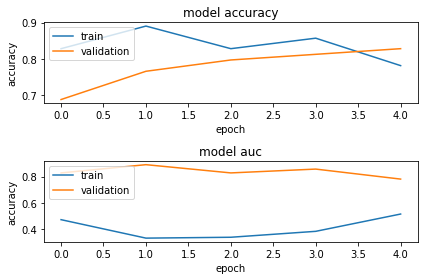

In [11]:
history = model.fit(training_iterator, steps_per_epoch=16, epochs=64, validation_data=validation_iterator, validation_steps=16, callbacks=[es])
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')
 
# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['accuracy'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend(['train', 'validation'], loc='upper left')
 
# used to keep plots from overlapping
fig.tight_layout()
 
fig.savefig('static/images/my_plots.png')